# About Dataset

The dataset offers comprehensive information on health factors influencing osteoporosis development, including demographic details, lifestyle choices, medical history, and bone health indicators. It aims to facilitate research in osteoporosis prediction, enabling machine learning models to identify individuals at risk. Analyzing factors like age, gender, hormonal changes, and lifestyle habits can help improve osteoporosis management and prevention strategies.

Age
The age of the individual in years.

Gender
The gender of the individual. This can be either "Male" or "Female".

Hormonal Changes
Indicates whether the individual has undergone hormonal changes, particularly related to menopause. This can be 'Normal', 'Postmenopausal'

Family History
Indicates whether there is a family history of osteoporosis or fractures. This can be "Yes" or "No".

Race/Ethnicity
The race or ethnicity of the individual. This can include categories such as "Caucasian", "African American", "Asian", etc.

Body Weight
The body weight status of the individual. This can be "Normal" or "Underweight".

Calcium Intake
The level of calcium intake in the individual's diet. This can be "Low" or "Adequate".

Vitamin D Intake
The level of vitamin D intake in the individual's diet. This can be "Insufficient" or "Sufficient".

Physical Activity
Indicates the level of physical activity of the individual. This can be "Sedentary" for low activity levels or "Active"

Smoking
Indicates whether the individual is a smoker. This can be "Yes" or "No".

Alcohol Consumption
Indicates the level of alcohol consumption by the individual. This can be "None" for non-drinkers or "Moderate" for moderate


Medical Conditions
Any existing medical conditions that the individual may have. This can include conditions like "Rheumatoid Arthritis" or "NaN" or "Hyperthyroidism"

Medications
Any medications that the individual is currently taking. This can include medications like "Corticosteroids" or "NaN"


Prior Fractures
Indicates whether the individual has previously experienced fractures. This can be "Yes" or "No"


Osteoporosis
The target variable indicating the presence or absence of osteoporosis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
df.info() 
# info pandas provide complete information about data, its type, number of empty rows, total number of rows, and data 
# type of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
df.describe()
# In Desccribe Pandas Provide Statestical Analysis of all The Numerical And Date Columns from Dataframe, this will Gives You
# Mean, Standard Deviation, Minimum, Maximum, Median, And Count with IQR

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [5]:
df.drop('Id', axis=1, inplace=True)
# I dropped the ID column because it is not important.  

In [6]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


# Exploratory Data Analysis (EDA)

# **Age:**

**What is the Distribution of ages in the dataset ?**

**How does age correlate with the likeihood of osteporosis ?**

In [7]:
# Age Distribution 
age_distribution = df['Age'].value_counts().sort_index()
print(age_distribution)

# Correlation between age and osteporosis
age_osteporosis_corr = df['Age'].corr(df['Osteoporosis'])
print(f"Correlation between age and osteoporosis: {age_osteporosis_corr}")

Age
18    152
19    147
20    109
21    117
22     99
     ... 
86     14
87     13
88      9
89     13
90      9
Name: count, Length: 73, dtype: int64
Correlation between age and osteoporosis: 0.6912382540603556


# **Gender :**
  
**What is the the gender distribution in the dataset ?**

**is there a significant difference in osteoporosis risk between genders?**

In [8]:
# Gender Distribution 
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Osteoporosis risk by gender
osteoporosis_by_gender = df.groupby('Gender')['Osteoporosis'].mean()
print(osteoporosis_by_gender)

Gender
Male      992
Female    966
Name: count, dtype: int64
Gender
Female    0.493789
Male      0.506048
Name: Osteoporosis, dtype: float64


# **Hormonal Change :**

**How does hormonal change affect the risk of osteoporosis?**

In [9]:
# Osteoporosis risk by hormonal change

osteoporosis_by_hormonal_change = df.groupby('Hormonal Changes')['Osteoporosis'].mean()
print(osteoporosis_by_hormonal_change)

Hormonal Changes
Normal            0.492355
Postmenopausal    0.507677
Name: Osteoporosis, dtype: float64


# **Family History:**

**What percentage of individuals with a family history of osteoporosis develop the condition?**

In [10]:
# Percentage of individuals with family history developing osteoporosis 

family_history_osteoporosis_perc = df.groupby('Family History')['Osteoporosis'].mean() 
print(family_history_osteoporosis_perc)

Family History
No     0.501002
Yes    0.498958
Name: Osteoporosis, dtype: float64


# **Race/Ethnicity:**

**How does race/ethnicity relate to the prevalence of osteoporosis?**

In [11]:
# Osteoporosis prevalence by race/ ethnicity

osteoporosis_by_race = df.groupby('Race/Ethnicity')['Osteoporosis'].mean() 
print(osteoporosis_by_race)

Race/Ethnicity
African American    0.505140
Asian               0.497623
Caucasian           0.496904
Name: Osteoporosis, dtype: float64


# **Calcium Intake:**

**How does calcium intake affect the risk of osteoporosis?**

In [12]:
# Osteoporosis risk by calcium intake 

osteoporosis_by_calcium_intake = df.groupby('Calcium Intake')['Osteoporosis'].mean() 
print(osteoporosis_by_calcium_intake)

Calcium Intake
Adequate    0.502096
Low         0.498008
Name: Osteoporosis, dtype: float64


# **Vitamin D Intake:**

**What is the relationship between vitamin D intake and osteoporosis risk?**

In [13]:
# Osteoporosis risk by vitamin D intake 

osteoporosis_by_vitamin_d_intake = df.groupby('Vitamin D Intake')['Osteoporosis'].mean() 
print(osteoporosis_by_vitamin_d_intake)

Vitamin D Intake
Insufficient    0.491024
Sufficient      0.508408
Name: Osteoporosis, dtype: float64


# **Physical Activity:**

**Does physical activity level impact the likelihood of osteoporosis?**

In [14]:
# Osteoporosis risk by physical activity level 

osteoporosis_by_physical_activity = df.groupby('Physical Activity')['Osteoporosis'].mean()
print(osteoporosis_by_physical_activity )


Physical Activity
Active       0.490695
Sedentary    0.510139
Name: Osteoporosis, dtype: float64


# **Smoking:**

**What is the association between smoking and osteoporosis risk?**

In [15]:
# Osteoporosis risk by smoking status 

osteoporosis_by_smoking = df.groupby('Smoking')['Osteoporosis'].mean() 
print(osteoporosis_by_smoking)

Smoking
No     0.508197
Yes    0.491853
Name: Osteoporosis, dtype: float64


# **Alcohol Consumption:**

**How does alcohol consumption relate to osteoporosis risk?**

In [16]:
# Osteoporosis risk by alcohol consumption

osteoporosis_by_alcohol_consumption = df.groupby('Alcohol Consumption')['Osteoporosis'].mean()
print(osteoporosis_by_alcohol_consumption)



Alcohol Consumption
Moderate    0.501031
Name: Osteoporosis, dtype: float64


# **Medical Conditions:**

**Do certain medical conditions increase the risk of osteoporosis?**

In [17]:
# Osteoporosis risk by medical conditions

osteoporosis_by_medical_conditions = df.groupby('Medical Conditions')['Osteoporosis'].mean()
print(osteoporosis_by_medical_conditions)

Medical Conditions
Hyperthyroidism         0.50590
Rheumatoid Arthritis    0.50237
Name: Osteoporosis, dtype: float64


# **Medications:**

**Is there a correlation between certain medications and osteoporosis risk?**

In [18]:
# Osteoporosis risk by medications 
osteoporosis_by_medications = df.groupby('Medications')['Osteoporosis'].mean() 
print(osteoporosis_by_medications)

Medications
Corticosteroids    0.516958
Name: Osteoporosis, dtype: float64


# **Prior Fractures:**

**How does a history of prior fractures influence the risk of osteoporosis?**

In [19]:
# Osteoporosis risk by prior fractures 
osteoporosis_by_prior_fractures = df.groupby('Prior Fractures')['Osteoporosis'].mean() 
print(osteoporosis_by_prior_fractures)

Prior Fractures
No     0.492308
Yes    0.507630
Name: Osteoporosis, dtype: float64


# **Age and Gender Interaction:**

**How does the interaction between age and gender impact osteoporosis risk?**

In [20]:
# Osteoporosis risk by age and gender 

osteoporosis_by_age_gender = df.groupby(['Age', 'Gender'])['Osteoporosis'].mean() 
print(osteoporosis_by_age_gender)

Age  Gender
18   Female    0.131579
     Male      0.131579
19   Female    0.116883
     Male      0.071429
20   Female    0.105263
                 ...   
88   Male      1.000000
89   Female    1.000000
     Male      1.000000
90   Female    1.000000
     Male      1.000000
Name: Osteoporosis, Length: 145, dtype: float64


# **Body Weight and Calcium Intake Interaction:**

**Is there an interaction effect between body weight and calcium intake on osteoporosis risk?**

In [21]:
# Osteoporosis risk by body weight and calcium intake 
osteoporosis_by_body_weight_calcium = df.groupby(['Body Weight', 'Calcium Intake'])['Osteoporosis'].mean() 
print(osteoporosis_by_body_weight_calcium)

Body Weight  Calcium Intake
Normal       Adequate          0.492901
             Low               0.473783
Underweight  Adequate          0.511931
             Low               0.525532
Name: Osteoporosis, dtype: float64


# **Physical Activity:**

**Does physical activity level impact the likelihood of osteoporosis?**

In [22]:
# Osteoporosis risk by physical activity level 

osteoporosis_by_physical_activity = df.groupby('Physical Activity')['Osteoporosis'].mean()
print(osteoporosis_by_physical_activity )

Physical Activity
Active       0.490695
Sedentary    0.510139
Name: Osteoporosis, dtype: float64


# **Smoking:**

**What is the association between smoking and osteoporosis risk?**

In [23]:
# Osteoporosis risk by smoking status 
osteoporosis_by_smoking = df.groupby('Smoking')['Osteoporosis'].mean() 
print(osteoporosis_by_smoking)

Smoking
No     0.508197
Yes    0.491853
Name: Osteoporosis, dtype: float64


# **Medical Conditions Impact:**

**Which specific medical conditions are strongly associated with osteoporosis risk?**

In [24]:
# Osteoporosis risk by medical conditions

osteoporosis_by_medical_conditions = df.groupby('Medical Conditions')['Osteoporosis'].mean().sort_values(ascending=False)
print(osteoporosis_by_medical_conditions)

Medical Conditions
Hyperthyroidism         0.50590
Rheumatoid Arthritis    0.50237
Name: Osteoporosis, dtype: float64


# **Medications Impact:**

**Do certain medications show a strong correlation with osteoporosis risk?**

In [25]:
# Osteoporosis risk by medications

osteoporosis_by_medications =df.groupby('Medications')['Osteoporosis'].mean().sort_values(ascending=False)
print(osteoporosis_by_medications)

Medications
Corticosteroids    0.516958
Name: Osteoporosis, dtype: float64


# **Prior Fractures Impacts**

**How does the interaction between prior fractures and age affect osteoporosis risk?**

In [26]:
# Osteoporosis risk by prior fractures and age

osteoporosis_by_prior_fractures_age = df.groupby(['Prior Fractures', 'Age'])['Osteoporosis'].mean() 
print(osteoporosis_by_prior_fractures_age)

Prior Fractures  Age
No               18     0.066667
                 19     0.109589
                 20     0.125000
                 21     0.103448
                 22     0.145833
                          ...   
Yes              86     1.000000
                 87     1.000000
                 88     1.000000
                 89     1.000000
                 90     1.000000
Name: Osteoporosis, Length: 146, dtype: float64


# **Alcohol Consumption and Smoking Interaction:**

**Is there a combined effect of alcohol consumption and smoking on osteoporosis risk?**

In [27]:
# Osteoporosis risk by alcohol consumption and smoking

osteoporosis_by_alcohol_smoking = df.groupby(['Alcohol Consumption','Smoking'])['Osteoporosis'].mean()
print(osteoporosis_by_alcohol_smoking)

Alcohol Consumption  Smoking
Moderate             No         0.502075
                     Yes        0.500000
Name: Osteoporosis, dtype: float64


# **Race/Ethnicity and Vitamin D Intake Impact:**

**How do race/ethnicity and vitamin D intake collectively influence osteoporosis risk?**

In [28]:
# Osteoporosis risk by race/ethnicity and vitamin D intake

osteoporosis_by_race_vitamin_d = df.groupby(['Race/Ethnicity', 'Vitamin D Intake'])['Osteoporosis'].mean()
print(osteoporosis_by_race_vitamin_d)

Race/Ethnicity    Vitamin D Intake
African American  Insufficient        0.506211
                  Sufficient          0.504178
Asian             Insufficient        0.483871
                  Sufficient          0.510903
Caucasian         Insufficient        0.482540
                  Sufficient          0.510574
Name: Osteoporosis, dtype: float64


# **Age Distribution:**

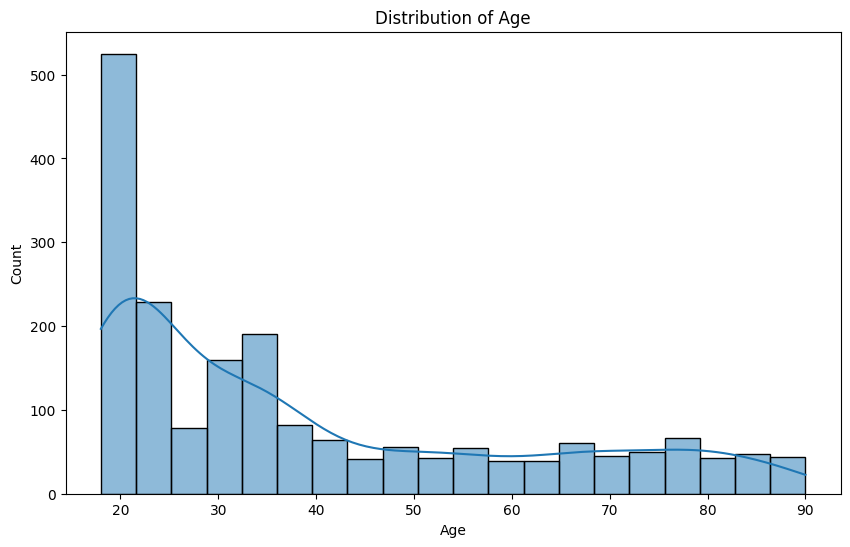

In [29]:
# Use a histogram to visualize the distribution of ages in the dataset

plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# **Osteoporosis by Gender:**

**Use a bar plot to compare the mean osteoporosis risk between genders.**

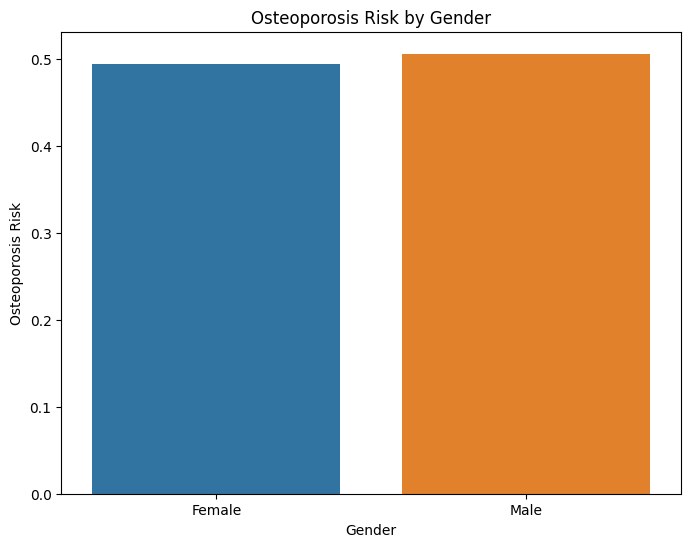

In [30]:
# Osteoporosis risk by gender

plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Osteoporosis', data=df, ci=None,hue="Gender")
plt.xlabel('Gender')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Gender')
plt.show()

# **Osteoporosis by Race/Ethnicity:**

**Create a box plot to compare the distribution of osteoporosis risk among different race/ethnicity groups.**

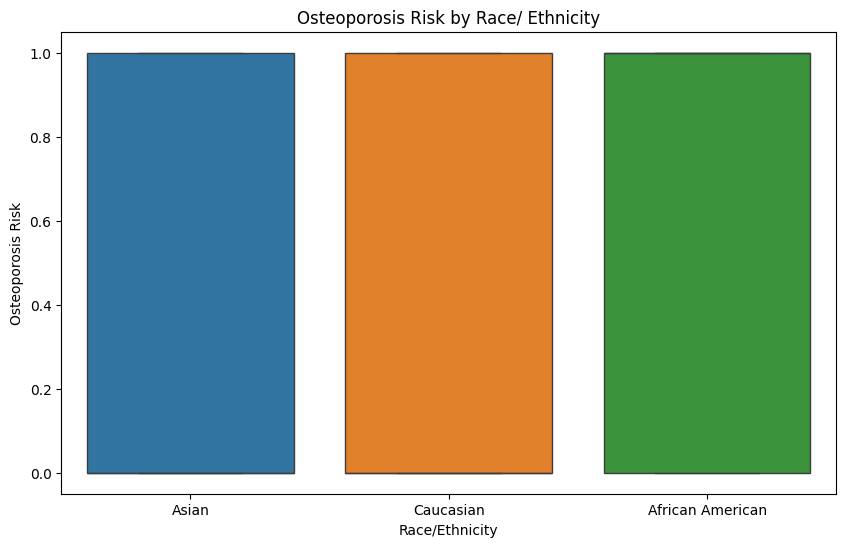

In [31]:
# Osteoporosis risk by race/ethnicity 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Race/Ethnicity', y='Osteoporosis', data=df, hue="Race/Ethnicity")
plt.xlabel('Race/Ethnicity') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Race/ Ethnicity')
plt.show()

# **Age and Osteoporosis Relationship:**

**Use a scatter plot to visualize the relationship between age and osteoporosis risk.**

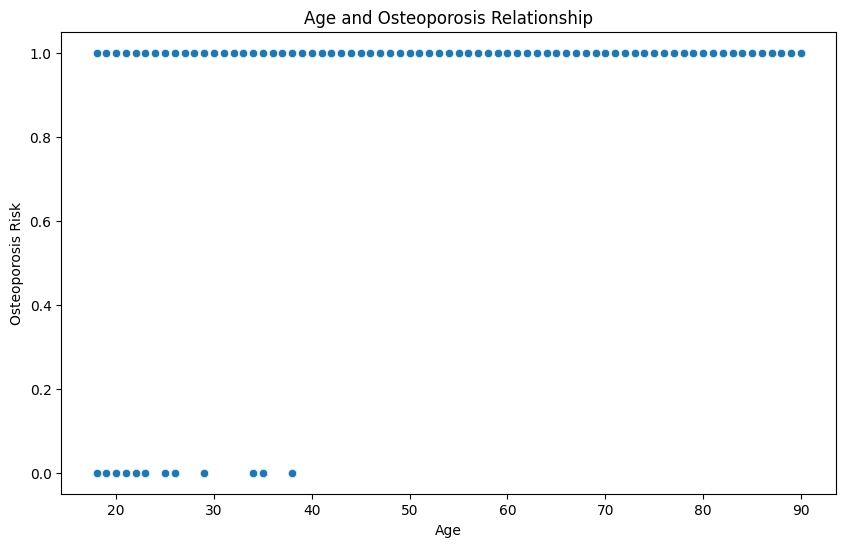

In [32]:
#Age and osteoporosis relationship 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Osteoporosis', data=df)
plt.xlabel('Age')
plt.ylabel('Osteoporosis Risk')
plt.title('Age and Osteoporosis Relationship')
plt.show()

In [33]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


# **Pairplot for multiple variables **


**Use a pairplot to visualize the relationships between multiple numerical variables.**

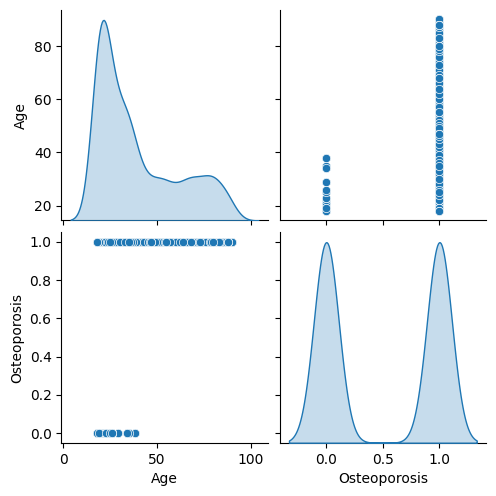

In [34]:
sns.pairplot(df[['Age', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Osteoporosis']], diag_kind='kde')
plt.show()

#These visualizations and analyses should provide you with a deeper understanding of the osteoporosis doet and its 
#underlying patterns

# **Age and Gender Distribution:**

**How does the distribution of age vary between different genders?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


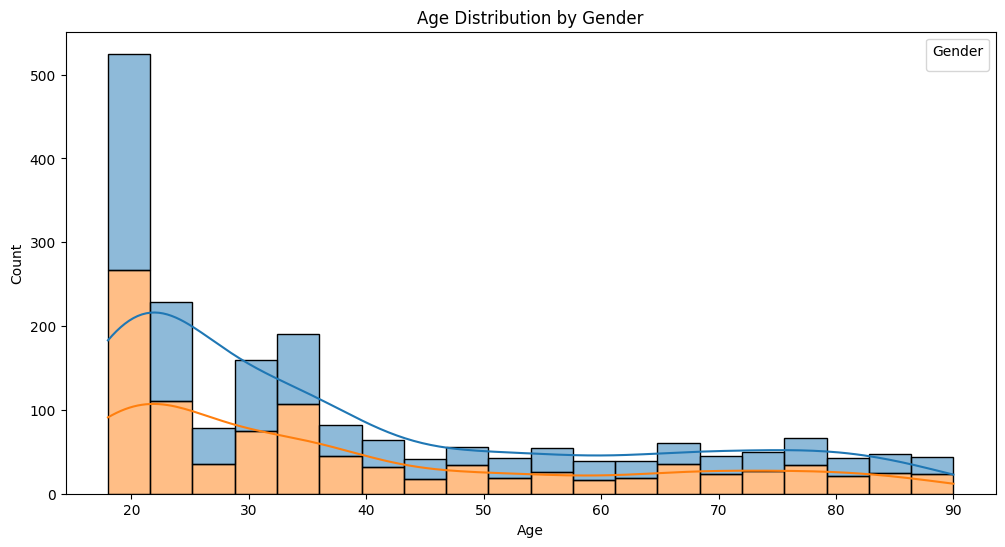

In [35]:
# Age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.legend(title='Gender')
plt.show()

# **Osteoporosis Risk by Hormonal Change:**

**What is the average osteoporosis risk for individuals with different hormonal changes?**

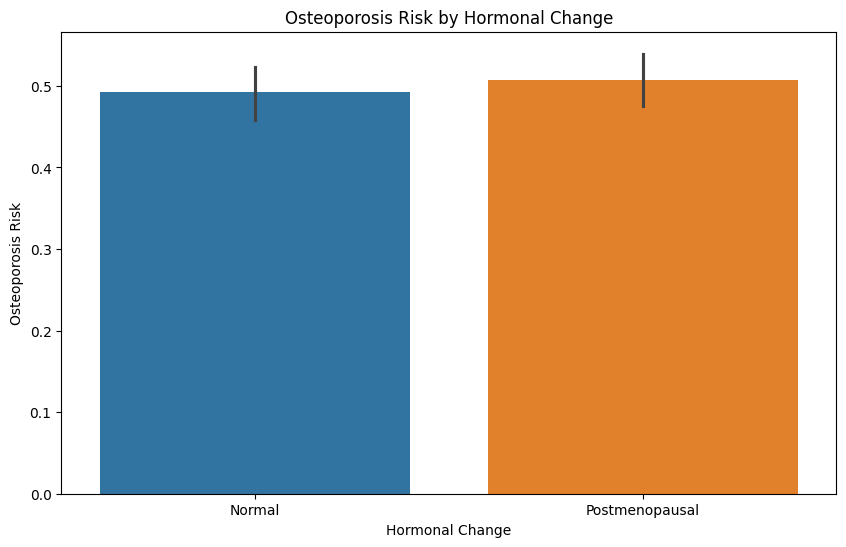

In [36]:
# Osteoporosis risk by hormonal change
plt.figure(figsize=(10, 6))
sns.barplot(x='Hormonal Changes', y='Osteoporosis', data=df, hue="Hormonal Changes") 
plt.xlabel('Hormonal Change') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Hormonal Change') 
plt.show()

# **Family History Impact on Osteoporosis Risk:**

**How does having a family history of osteoporosis affect an individual's osteoporosis risk?**

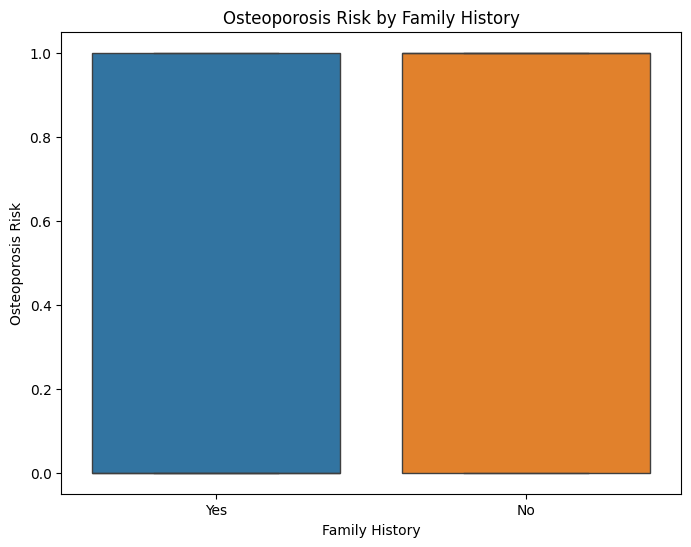

In [37]:
# Osteoporosis risk by family history

plt.figure(figsize=(8, 6))
sns.boxplot(x='Family History',y='Osteoporosis', data=df, hue="Family History")
plt.xlabel('Family History')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Family History')
plt.show()

# **Race/Ethnicity and Medical Conditions:**

**How do race/ethnicity and medical conditions collectively influence osteoporosis risk?**

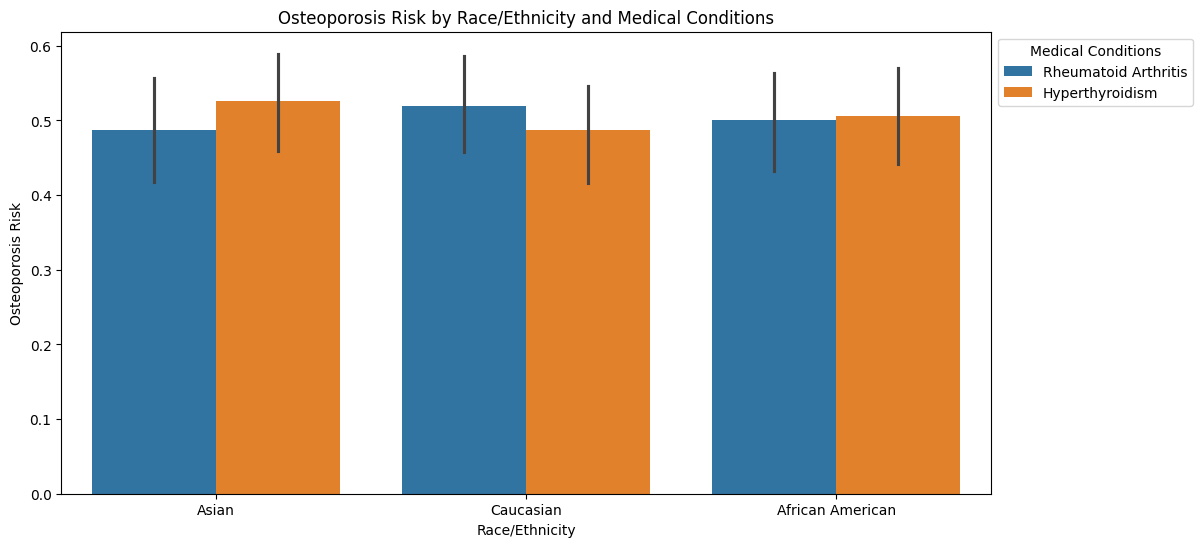

In [38]:
# Osteoporosis risk by race/ethnicity and medical conditions

plt.figure(figsize=(12, 6))
sns.barplot(x='Race/Ethnicity', y='Osteoporosis', hue='Medical Conditions', data=df)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Race/Ethnicity and Medical Conditions')
plt.legend(title='Medical Conditions', bbox_to_anchor=(1, 1))
plt.show()

# **Osteoporosis Risk by Medications and Prior Fractures:**

**How do medications and prior fractures collectively impact osteoporosis risk?**

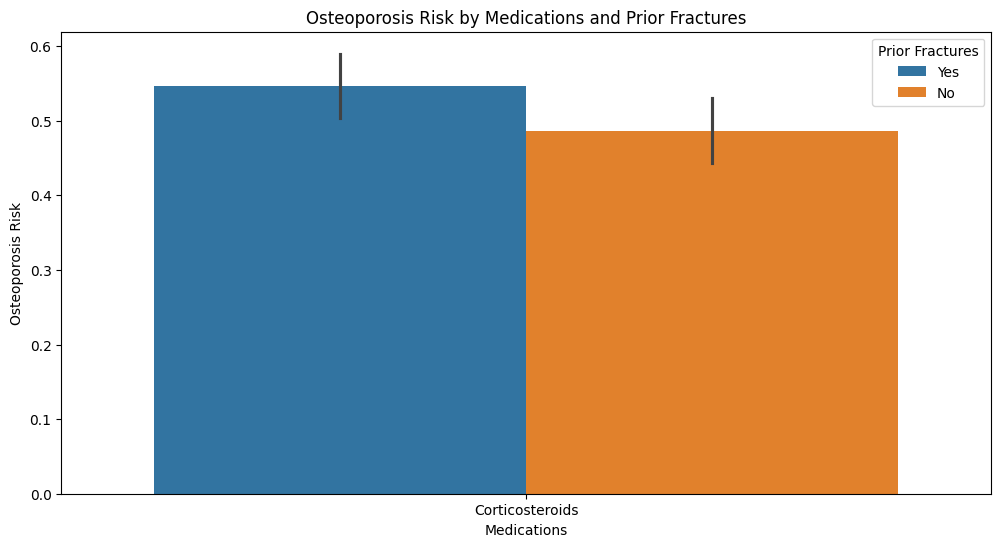

In [39]:
# Osteoporosis risk by medications and prior fractures 
plt.figure(figsize=(12,6)) 
sns.barplot(x='Medications', y='Osteoporosis', hue='Prior Fractures', data=df) 
plt.xlabel('Medications') 
plt.ylabel('Osteoporosis Risk') 
plt.title('Osteoporosis Risk by Medications and Prior Fractures') 
plt.legend(title='Prior Fractures',bbox_to_anchor= (1, 1))
plt.show()

# **Calcium and Vitamin D Intake Interaction:**

**Is there an interaction effect between calcium intake and vitamin D intake on osteoporosis risk?**

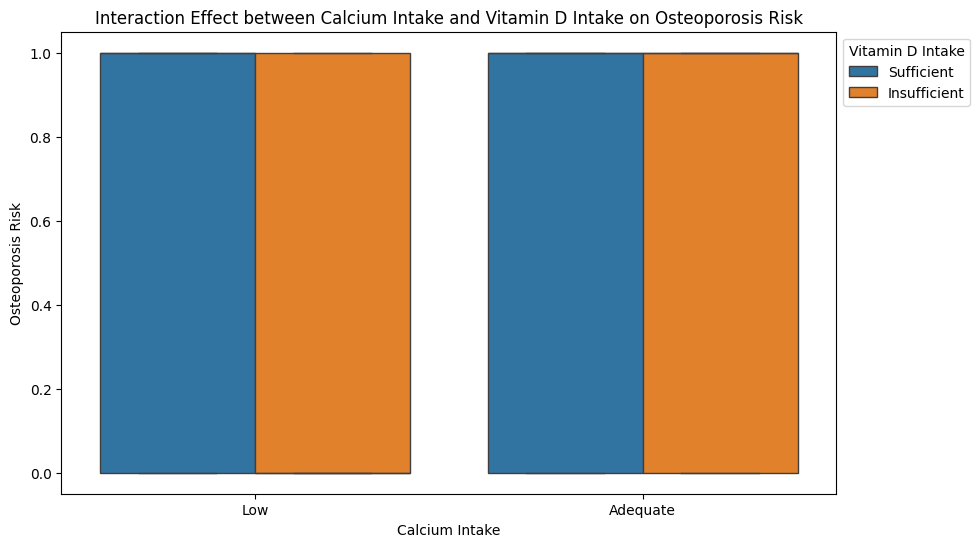

In [40]:
# Interaction effect between calcium intake and vitamin D intake on osteoporosis risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='Calcium Intake', y='Osteoporosis', hue='Vitamin D Intake', data=df)
plt.xlabel('Calcium Intake')
plt.ylabel('Osteoporosis Risk')
plt.title('Interaction Effect between Calcium Intake and Vitamin D Intake on Osteoporosis Risk')
plt.legend(title='Vitamin D Intake', bbox_to_anchor=(1, 1))
plt.show()

# **Physical Activity and Smoking Impact:**

**How do physical activity level and smoking status collectively influence osteoporosis risk?**

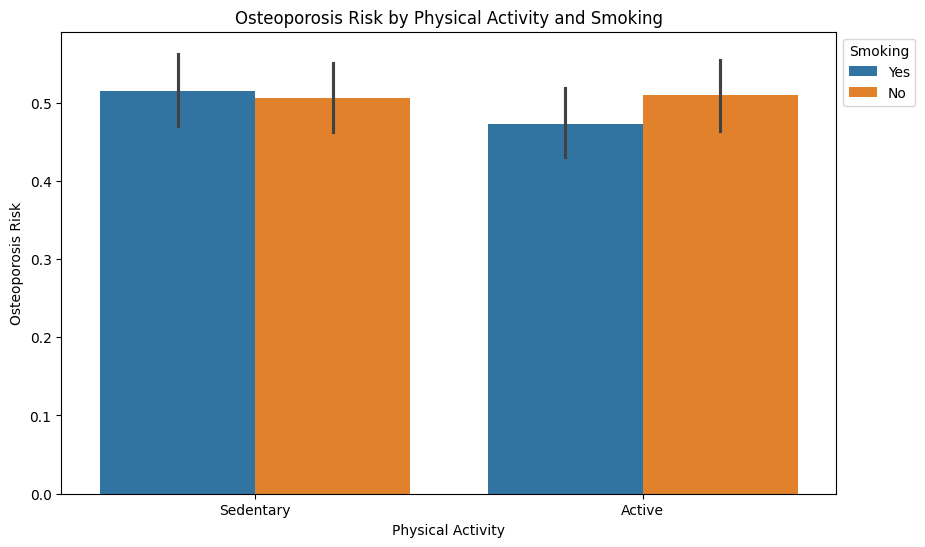

In [41]:
# Osteoporosis risk by physical activity and smoking

plt.figure(figsize=(10, 6))
sns.barplot(x='Physical Activity',y='Osteoporosis', hue='Smoking', data=df)
plt.xlabel('Physical Activity') 
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Physical Activity and Smoking')
plt.legend(title='Smoking', bbox_to_anchor=(1, 1))
plt.show()

# **Body Weight and Age Interaction:**

**How does the interaction between body weight and age affect osteoporosis risk?**

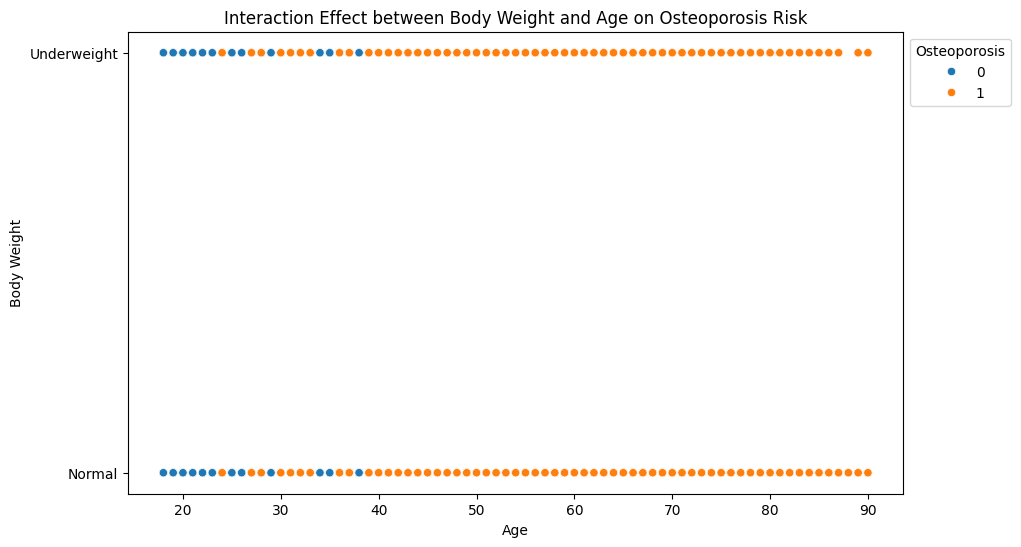

In [42]:
# Interaction effect between body weight and age on osteoporosis risk

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Body Weight', hue='Osteoporosis', data=df)
plt.xlabel('Age')
plt.ylabel('Body Weight')
plt.title('Interaction Effect between Body Weight and Age on Osteoporosis Risk')
plt.legend(title='Osteoporosis', bbox_to_anchor=(1, 1))
plt.show()

# **Alcohol Consumption and Race/ Ethnicity Impact:**

**How do alcohol consumption and race/ethnicity collectively influence osteoporosis risk?**

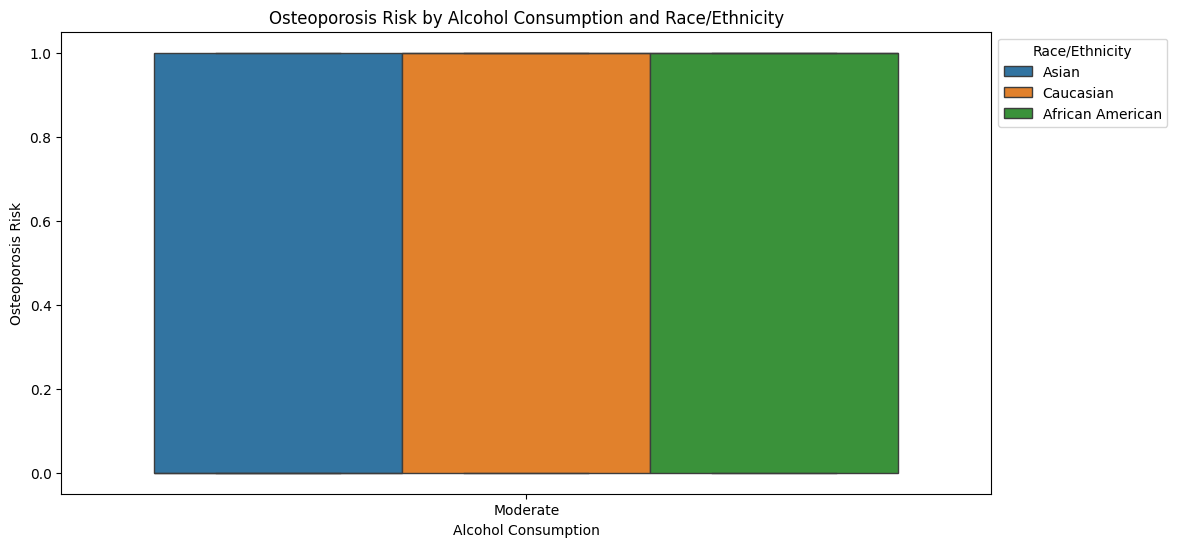

In [43]:
# Osteoporosis risk by alcohol consumption and race/ethnicity

plt.figure(figsize=(12,6))
sns.boxplot(x='Alcohol Consumption', y='Osteoporosis', hue='Race/Ethnicity',data=df)
plt.xlabel('Alcohol Consumption') 
plt.ylabel('Osteoporosis Risk')
plt.title('Osteoporosis Risk by Alcohol Consumption and Race/Ethnicity')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1, 1))
plt.show()

# **Prior Fractures and Medical Conditions Impact:**

**How do prior fractures and medical conditions collectively impact osteoporosis risk?**

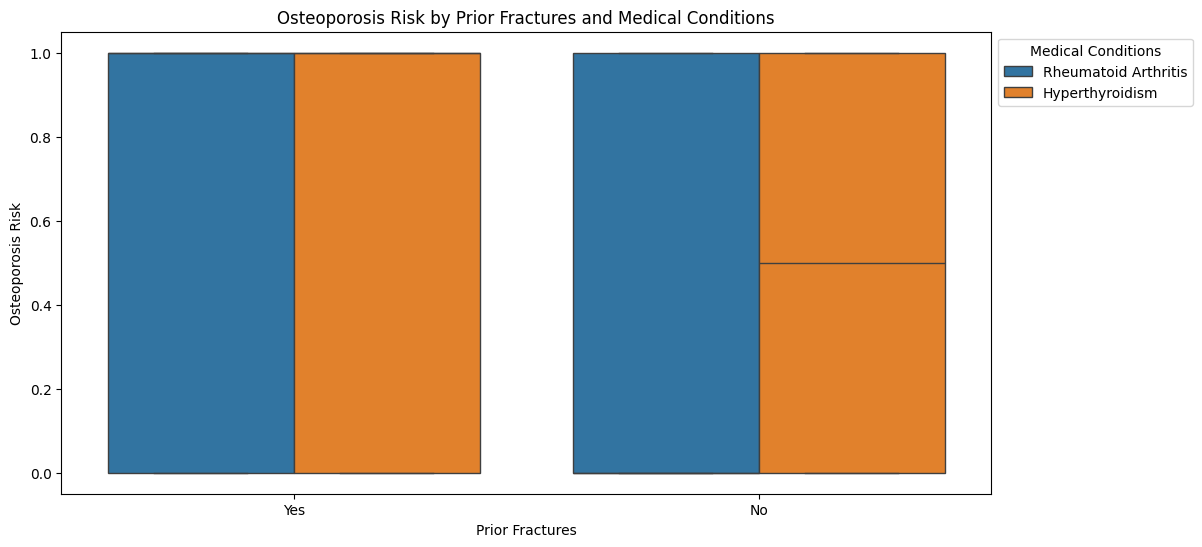

In [44]:
# Osteoporosis risk by prior fractures and medical conditions

plt.figure(figsize=(12,6))
sns.boxplot(x='Prior Fractures', y='Osteoporosis', hue='Medical Conditions', data=df) 
plt.title('Osteoporosis Risk by Prior Fractures and Medical Conditions')
plt.xlabel('Prior Fractures') 
plt.ylabel('Osteoporosis Risk')
plt.legend(title='Medical Conditions', bbox_to_anchor= (1, 1))
plt.show()

In [45]:
df['Age_Group'] = pd.cut(df['Age'], bins=4 , labels=["18-30", "31-46", "47-72", "73-90"])
# I made Age Column. Because the minimum age is 18 and the maximum age is 90, there are more numbers in between this range, 
# thus for analysis, we created an age group.

In [46]:
a=df[df['Age_Group']=='18-30']
b=df[df['Age_Group']=='31-46']
c=df[df['Age_Group']=='47-72']
d=df[df['Age_Group']=='73-90']

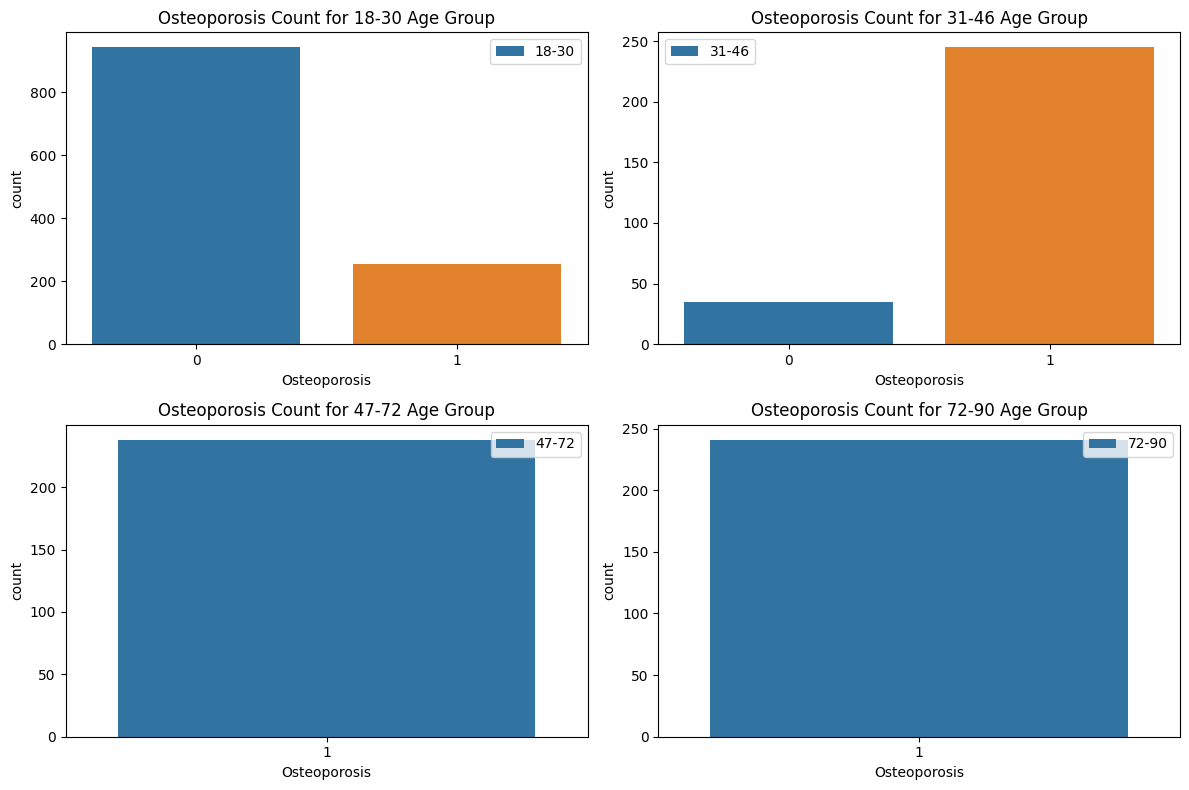

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming a, b, c are dataframes for different age groups

plt.figure(figsize=(12, 8))

# Plot for age group 18-30
plt.subplot(221)
sns.countplot(x=a["Osteoporosis"], hue=a["Osteoporosis"])
plt.legend(["18-30"])
plt.title("Osteoporosis Count for 18-30 Age Group")

# Plot for age group 31-46
plt.subplot(222)
sns.countplot(x=b["Osteoporosis"], hue=b["Osteoporosis"])
plt.legend(["31-46"])
plt.title("Osteoporosis Count for 31-46 Age Group")

# Plot for age group 47-72
plt.subplot(223)
sns.countplot(x=c["Osteoporosis"], hue=c["Osteoporosis"])
plt.legend(["47-72"])
plt.title("Osteoporosis Count for 47-72 Age Group")

# Plot for age group 72-90
plt.subplot(224)
sns.countplot(x=d["Osteoporosis"], hue=d["Osteoporosis"])
plt.legend(["72-90"])
plt.title("Osteoporosis Count for 72-90 Age Group")

plt.tight_layout()
plt.show()

**I observed that all the age group has Osteoporosis but it is more observed in older age groups.**

In [48]:
df.drop('Age_Group', axis=1, inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 
                     'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 
                     'Medical Conditions', 'Smoking', 'Alcohol Consumption', 'Prior Fractures', 
                     'Medications']

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Now the specified columns have been label encoded in the DataFrame df

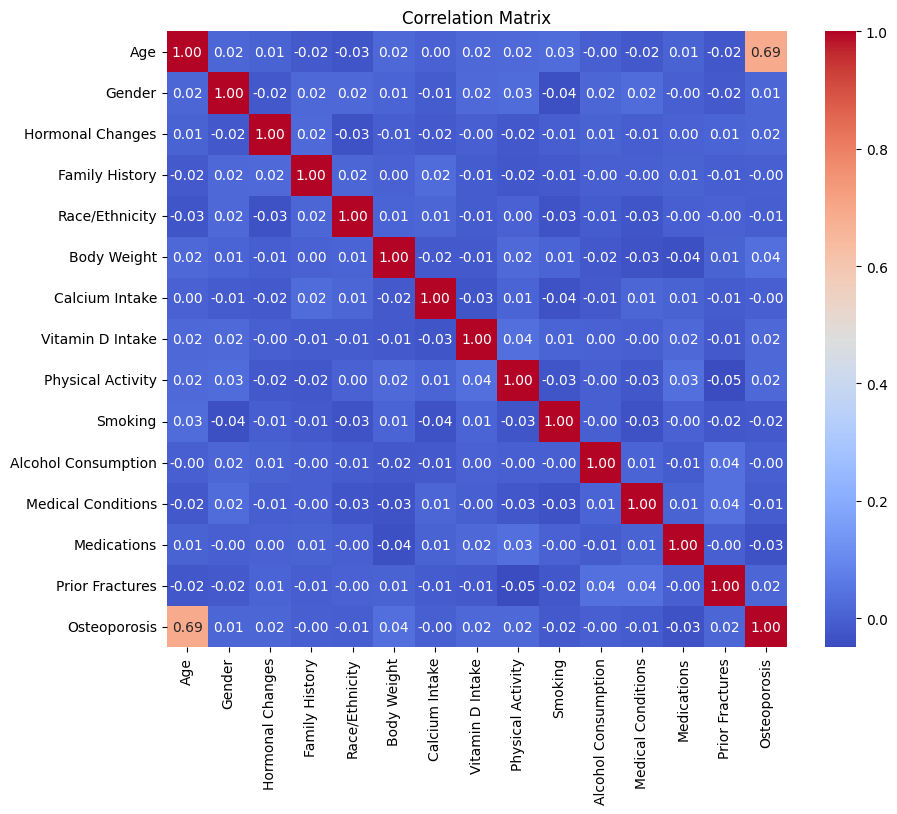

In [50]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Summary statistics
summary_stats = df.describe()

# Correlation matrix
correlation_matrix = df.corr()


**Looking at the correlation matrix we can see that the categorical features do not have much impact on the target. The main driver is "Age".**

# Binary Classifcation Predictive Modeling
**Apply different machine learning algorithms like**

# 1. Logistic regression

# 2. Decision trees

# 3. Support Vector Regression

# 4. Gradient Boosting

# 5. K-Nearest Neighbors

**to create predictive models for binary classifcation.**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df.drop(['Osteoporosis'], axis=1)  # Exclude 'Id' column
y = df['Osteoporosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score * 100:.2f}%")
    print(f"    Mean Squared Error :{mse * 100:.2f}%")
    print(f"        r2_Score :{r2 * 100:.2f}%")

Logistic Regression Accuracy: 80.61%
    Mean Squared Error :19.39%
        r2_Score :22.43%
Decision Tree Accuracy: 83.42%
    Mean Squared Error :16.58%
        r2_Score :33.66%
Support Vector Classifier Accuracy: 84.95%
    Mean Squared Error :15.05%
        r2_Score :39.78%
Gradient Boosting Classifier Accuracy: 90.82%
    Mean Squared Error :9.18%
        r2_Score :63.26%
K-Nearest Neighbors Accuracy: 86.22%
    Mean Squared Error :13.78%
        r2_Score :44.89%


# Feature Importance Analysis

In [52]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Osteoporosis'], axis=1)
y = df['Osteoporosis']

# Initialize the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                feature  importance
0                   Age    0.641323
11   Medical Conditions    0.043986
4        Race/Ethnicity    0.042340
3        Family History    0.026936
6        Calcium Intake    0.026271
10  Alcohol Consumption    0.026000
13      Prior Fractures    0.025308
1                Gender    0.025240
2      Hormonal Changes    0.024850
9               Smoking    0.024400
8     Physical Activity    0.024277
7      Vitamin D Intake    0.024162
5           Body Weight    0.022474
12          Medications    0.022433
